# Определение перспективного тарифа для телеком-компании

Необходимо провести анализ тарифов на  выборке клиентов. Есть данные 500 пользователей «Мегалайна»: кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018 год. 
Нужно проанализировать поведение клиентов и сделать вывод — какой тариф лучше.

Описание тарифов

Тариф «Смарт»

- Ежемесячная плата: 550 рублей
- Включено 500 минут разговора, 50 сообщений и 15 Гб интернет-трафика
- Стоимость услуг сверх тарифного пакета: 1. минута разговора: 3 рубля («Мегалайн» всегда округляет вверх значения минут и мегабайтов. Если пользователь проговорил всего 1 секунду, в тарифе засчитывается целая минута); 2. сообщение: 3 рубля; 3. 1 Гб интернет-трафика: 200 рублей.

Тариф «Ультра»

- Ежемесячная плата: 1950 рублей
- Включено 3000 минут разговора, 1000 сообщений и 30 Гб интернет-трафика
-  Стоимость услуг сверх тарифного пакета: 1. минута разговора: 1 рубль; 2. сообщение: 1 рубль; 3. 1 Гб интернет-трафика: 150 рублей.

## Изучение данных из файла

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats as st
import numpy as np
import math
import seaborn as sns

In [2]:
calls=pd.read_csv('/datasets/calls.csv', sep=',')
calls

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000
...,...,...,...,...
202602,1499_215,2018-12-26,0.76,1499
202603,1499_216,2018-10-18,18.83,1499
202604,1499_217,2018-11-10,10.81,1499
202605,1499_218,2018-10-06,4.27,1499


In [3]:
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null object
duration     202607 non-null float64
user_id      202607 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


In [4]:
internet=pd.read_csv('/datasets/internet.csv', sep=',')
internet

,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000
...,...,...,...,...,...
149391,149391,1499_152,318.90,2018-10-03,1499
149392,149392,1499_153,490.13,2018-12-14,1499
149393,149393,1499_154,0.00,2018-10-27,1499
149394,149394,1499_155,1246.32,2018-11-26,1499


In [5]:
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
Unnamed: 0      149396 non-null int64
id              149396 non-null object
mb_used         149396 non-null float64
session_date    149396 non-null object
user_id         149396 non-null int64
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


дублируется индекс в колонке `Unnamed: 0`удалим данный столбец

In [6]:
internet=internet.drop(columns='Unnamed: 0') 
internet

,id,mb_used,session_date,user_id
0,1000_0,112.95,2018-11-25,1000
1,1000_1,1052.81,2018-09-07,1000
2,1000_2,1197.26,2018-06-25,1000
3,1000_3,550.27,2018-08-22,1000
4,1000_4,302.56,2018-09-24,1000
...,...,...,...,...
149391,1499_152,318.90,2018-10-03,1499
149392,1499_153,490.13,2018-12-14,1499
149393,1499_154,0.00,2018-10-27,1499
149394,1499_155,1246.32,2018-11-26,1499


In [7]:
messages=pd.read_csv('/datasets/messages.csv', sep=',')
messages

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000
...,...,...,...
123031,1499_179,2018-12-12,1499
123032,1499_180,2018-09-28,1499
123033,1499_181,2018-09-27,1499
123034,1499_182,2018-11-15,1499


In [8]:
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id              123036 non-null object
message_date    123036 non-null object
user_id         123036 non-null int64
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


In [9]:
tariffs=pd.read_csv('/datasets/tariffs.csv', sep=',')
tariffs=tariffs.rename(columns={'tariff_name':'tariff'})#переименуем столбец tariff_name
tariffs

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


In [10]:
users=pd.read_csv('/datasets/users.csv', sep=',')
users

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra
...,...,...,...,...,...,...,...,...
495,1495,65,NaN,Иркутск,Авксентий,Фокин,2018-08-28,ultra
496,1496,36,NaN,Вологда,Трифон,Блохин,2018-01-27,smart
497,1497,32,NaN,Челябинск,Каролина,Агеева,2018-10-09,smart
498,1498,68,2018-10-25,Владикавказ,Всеволод,Акимчин,2018-07-19,smart


In [11]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    38 non-null object
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null object
tariff        500 non-null object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [12]:
users.isna().sum()

user_id         0
age             0
churn_date    462
city            0
first_name      0
last_name       0
reg_date        0
tariff          0
dtype: int64

В столбце `churn_date`  462 пропущенных значений. Если значение пропущено, то тариф ещё действовал на момент выгрузки данных. Думаю, стоит оставить как есть.

Во всех таблицах дата имеет тип данных "object" , заменим на тип в datetime. 

В таблицах calls, internet меняем тип данных на целочисленный в столбцах `duration`, `mb_used` и округляем до большего значения. Как нам известно, "Мегалайн" всегда округляет секунды до минут, а мегабайты — до гигабайт.

## Предобработка данных

In [13]:
#первеедем столбец call_date в datetime:
calls['call_date']=pd.to_datetime(calls['call_date'], format='%Y-%m-%dT%H:%M:%S')

In [14]:
#поменяем тип данных на целочисленный в столбце duration и округлим в большую сторону:
calls['duration'] = np.ceil(calls['duration']).astype('Int64')

In [15]:
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null datetime64[ns]
duration     202607 non-null Int64
user_id      202607 non-null int64
dtypes: Int64(1), datetime64[ns](1), int64(1), object(1)
memory usage: 6.4+ MB


In [16]:
calls

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0,1000
1,1000_1,2018-08-17,0,1000
2,1000_2,2018-06-11,3,1000
3,1000_3,2018-09-21,14,1000
4,1000_4,2018-12-15,6,1000
...,...,...,...,...
202602,1499_215,2018-12-26,1,1499
202603,1499_216,2018-10-18,19,1499
202604,1499_217,2018-11-10,11,1499
202605,1499_218,2018-10-06,5,1499


In [17]:
#первеедем столбец session_date в datetime:
internet['session_date']=pd.to_datetime(internet['session_date'], format='%Y-%m-%dT%H:%M:%S')

In [20]:
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 4 columns):
id              149396 non-null object
mb_used         149396 non-null float64
session_date    149396 non-null datetime64[ns]
user_id         149396 non-null int64
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 4.6+ MB


In [21]:
internet

,id,mb_used,session_date,user_id
0,1000_0,112.95,2018-11-25,1000
1,1000_1,1052.81,2018-09-07,1000
2,1000_2,1197.26,2018-06-25,1000
3,1000_3,550.27,2018-08-22,1000
4,1000_4,302.56,2018-09-24,1000
...,...,...,...,...
149391,1499_152,318.90,2018-10-03,1499
149392,1499_153,490.13,2018-12-14,1499
149393,1499_154,0.00,2018-10-27,1499
149394,1499_155,1246.32,2018-11-26,1499


In [22]:
#первеедем столбец message_date в datetime:
messages['message_date']=pd.to_datetime(messages['message_date'], format='%Y-%m-%dT%H:%M:%S')

In [23]:
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id              123036 non-null object
message_date    123036 non-null datetime64[ns]
user_id         123036 non-null int64
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 2.8+ MB


In [24]:
messages

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000
...,...,...,...
123031,1499_179,2018-12-12,1499
123032,1499_180,2018-09-28,1499
123033,1499_181,2018-09-27,1499
123034,1499_182,2018-11-15,1499


In [25]:
#первеедем столбец reg_date в datetime:
users['reg_date']=pd.to_datetime(users['reg_date'], format='%Y-%m-%dT%H:%M:%S')

In [26]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    38 non-null object
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null datetime64[ns]
tariff        500 non-null object
dtypes: datetime64[ns](1), int64(2), object(5)
memory usage: 31.4+ KB


Посчитаем количество сделанных звонков и израсходованных минут разговора по месяцам

In [27]:
#добавим столбец месяц в таблицу calls:
calls['month']=calls['call_date'].dt.month 
calls


,id,call_date,duration,user_id,month
0,1000_0,2018-07-25,0,1000,7
1,1000_1,2018-08-17,0,1000,8
2,1000_2,2018-06-11,3,1000,6
3,1000_3,2018-09-21,14,1000,9
4,1000_4,2018-12-15,6,1000,12
...,...,...,...,...,...
202602,1499_215,2018-12-26,1,1499,12
202603,1499_216,2018-10-18,19,1499,10
202604,1499_217,2018-11-10,11,1499,11
202605,1499_218,2018-10-06,5,1499,10


In [28]:
#создадим сводную таблицу по каждому пользователю и израсходованных минут разговора по месяцам: 
group_calls=calls.pivot_table(index=['user_id', 'month'],values='duration',aggfunc=(['sum', 'count']))
group_calls.columns = ['minutes', 'calls'] 
group_calls

minutes  calls
user_id month                
1000    5          159     22
        6          172     43
        7          340     47
        8          408     52
        9          466     58
...                ...    ...
1498    10         247     41
1499    9           70      9
        10         449     68
        11         612     74
        12         492     69

[3174 rows x 2 columns]

Посчитаем для каждого пользователя количество отправленных сообщений по месяцам.

In [29]:
#добавим столбец месяц в таблицу messages:
messages['month']=messages['message_date'].dt.month
messages

,id,message_date,user_id,month
0,1000_0,2018-06-27,1000,6
1,1000_1,2018-10-08,1000,10
2,1000_2,2018-08-04,1000,8
3,1000_3,2018-06-16,1000,6
4,1000_4,2018-12-05,1000,12
...,...,...,...,...
123031,1499_179,2018-12-12,1499,12
123032,1499_180,2018-09-28,1499,9
123033,1499_181,2018-09-27,1499,9
123034,1499_182,2018-11-15,1499,11


In [30]:
#создадим сводную таблицу по каждому пользователю и количество отправленных сообщений по месяцам: 
group_messages=messages.pivot_table(index=['user_id', 'month'],values='message_date',aggfunc=('count'))
group_messages

message_date
user_id month              
1000    5                22
        6                60
        7                75
        8                81
        9                57
...                     ...
1498    10               42
1499    9                11
        10               48
        11               59
        12               66

[2717 rows x 1 columns]

Посчитаем объем израсходованного интернет-трафика по месяцам для каждого пользователя.

In [31]:
#добавим столбец месяц в таблицу internet:
internet['month']=internet['session_date'].dt.month
internet

,id,mb_used,session_date,user_id,month
0,1000_0,112.95,2018-11-25,1000,11
1,1000_1,1052.81,2018-09-07,1000,9
2,1000_2,1197.26,2018-06-25,1000,6
3,1000_3,550.27,2018-08-22,1000,8
4,1000_4,302.56,2018-09-24,1000,9
...,...,...,...,...,...
149391,1499_152,318.90,2018-10-03,1499,10
149392,1499_153,490.13,2018-12-14,1499,12
149393,1499_154,0.00,2018-10-27,1499,10
149394,1499_155,1246.32,2018-11-26,1499,11


In [32]:
#добавим столбец месяц в таблицу users:
users['month']=users['reg_date'].dt.month
users.head(10)

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff,month
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,5
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart,11
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart,6
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra,8
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra,5
5,1005,67,NaN,Набережные Челны,Афанасий,Горлов,2018-01-25,smart,1
6,1006,21,NaN,Ульяновск,Леонид,Ермолаев,2018-02-26,smart,2
7,1007,65,NaN,Москва,Юна,Березина,2018-04-19,smart,4
8,1008,63,NaN,Челябинск,Рустэм,Пономарёв,2018-12-19,smart,12
9,1009,24,NaN,Пермь,Василиса,Блинова,2018-03-22,smart,3


In [33]:
#создадим сводную таблицу по  каждому пользователю и объему израсходованного интернет-трафика по месяцам: 
group_internet=internet.pivot_table(index=['user_id', 'month'],values='mb_used',aggfunc=('sum'))
group_internet

mb_used
user_id month          
1000    5       2253.49
        6      23233.77
        7      14003.64
        8      14055.93
        9      14568.91
...                 ...
1498    10     20579.36
1499    9       1845.75
        10     17788.51
        11     17963.31
        12     13055.58

[3203 rows x 1 columns]

In [34]:
#объединим таблицы group_messages и group_calls:
df=group_messages.merge(group_calls,on=['user_id','month'], how='outer')

In [35]:
#объединим таблицы df и group_internet:
call_mess_int_group=df.merge(group_internet,on=['user_id','month'], how='outer').reset_index()
call_mess_int_group


,user_id,month,message_date,minutes,calls,mb_used
0,1000,5,22.0,159,22.0,2253.49
1,1000,6,60.0,172,43.0,23233.77
2,1000,7,75.0,340,47.0,14003.64
3,1000,8,81.0,408,52.0,14055.93
4,1000,9,57.0,466,58.0,14568.91
...,...,...,...,...,...,...
3209,1494,9,NaN,501,66.0,16962.51
3210,1494,10,NaN,354,52.0,17767.24
3211,1494,11,NaN,411,63.0,18052.45
3212,1494,12,NaN,418,62.0,17621.21


In [36]:
call_mess_int_group.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3214 entries, 0 to 3213
Data columns (total 6 columns):
user_id         3214 non-null int64
month           3214 non-null int64
message_date    2717 non-null float64
minutes         3174 non-null Int64
calls           3174 non-null float64
mb_used         3203 non-null float64
dtypes: Int64(1), float64(3), int64(2)
memory usage: 153.9 KB


Появилось очень много пропусков.Для корректных расчетов, заполним данные пропуски 0.

In [37]:
columns = ['calls', 'minutes', 'message_date', 'mb_used']

for column in columns:
    call_mess_int_group[column] = call_mess_int_group[column].fillna(0)
    


In [38]:
call_mess_int_group.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3214 entries, 0 to 3213
Data columns (total 6 columns):
user_id         3214 non-null int64
month           3214 non-null int64
message_date    3214 non-null float64
minutes         3214 non-null Int64
calls           3214 non-null float64
mb_used         3214 non-null float64
dtypes: Int64(1), float64(3), int64(2)
memory usage: 153.9 KB


In [39]:
#объединим таблицы call_mess_int_group и users:
all_group=call_mess_int_group.merge(users[['user_id','tariff','city']],on=['user_id'], how='left')
all_group
#сразу переименуем столбцы:
all_group=all_group \
    .rename(columns={'message_date':'messages',
                     'mb_used':'gbs'}) 
all_group

,user_id,month,messages,minutes,calls,gbs,tariff,city
0,1000,5,22.0,159,22.0,2253.49,ultra,Краснодар
1,1000,6,60.0,172,43.0,23233.77,ultra,Краснодар
2,1000,7,75.0,340,47.0,14003.64,ultra,Краснодар
3,1000,8,81.0,408,52.0,14055.93,ultra,Краснодар
4,1000,9,57.0,466,58.0,14568.91,ultra,Краснодар
...,...,...,...,...,...,...,...,...
3209,1494,9,0.0,501,66.0,16962.51,smart,Омск
3210,1494,10,0.0,354,52.0,17767.24,smart,Омск
3211,1494,11,0.0,411,63.0,18052.45,smart,Омск
3212,1494,12,0.0,418,62.0,17621.21,smart,Омск


In [40]:
#объединим таблицы all_group и tariffs:
final_df=all_group.merge(tariffs,on='tariff', how='left')
final_df

,user_id,month,messages,minutes,calls,gbs,tariff,city,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
0,1000,5,22.0,159,22.0,2253.49,ultra,Краснодар,1000,30720,3000,1950,150,1,1
1,1000,6,60.0,172,43.0,23233.77,ultra,Краснодар,1000,30720,3000,1950,150,1,1
2,1000,7,75.0,340,47.0,14003.64,ultra,Краснодар,1000,30720,3000,1950,150,1,1
3,1000,8,81.0,408,52.0,14055.93,ultra,Краснодар,1000,30720,3000,1950,150,1,1
4,1000,9,57.0,466,58.0,14568.91,ultra,Краснодар,1000,30720,3000,1950,150,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3209,1494,9,0.0,501,66.0,16962.51,smart,Омск,50,15360,500,550,200,3,3
3210,1494,10,0.0,354,52.0,17767.24,smart,Омск,50,15360,500,550,200,3,3
3211,1494,11,0.0,411,63.0,18052.45,smart,Омск,50,15360,500,550,200,3,3
3212,1494,12,0.0,418,62.0,17621.21,smart,Омск,50,15360,500,550,200,3,3


In [41]:
final_df.isna().sum()

user_id                  0
month                    0
messages                 0
minutes                  0
calls                    0
gbs                      0
tariff                   0
city                     0
messages_included        0
mb_per_month_included    0
minutes_included         0
rub_monthly_fee          0
rub_per_gb               0
rub_per_message          0
rub_per_minute           0
dtype: int64

Посчитаем помесячную выручку с каждого пользователя (вычтим бесплатный лимит из суммарного количества звонков, сообщений и интернет-трафика; остаток умножим на значение из тарифного плана; прибавим абонентскую плату, соответствующую тарифному плану).

In [42]:
final_df['minutes_overrun']  = final_df['minutes'] - final_df['minutes_included']
final_df['messages_overrun'] = final_df['messages'] - final_df['messages_included']
final_df['gbs_overrun']  = np.ceil((final_df['gbs'] - final_df['mb_per_month_included'])/1024)

In [43]:
final_df['gbs_overrun']

0      -27.0
1       -7.0
2      -16.0
3      -16.0
4      -15.0
        ... 
3209     2.0
3210     3.0
3211     3.0
3212     3.0
3213   -29.0
Name: gbs_overrun, Length: 3214, dtype: float64

In [44]:
#напишем функцию для подcчета выручки и применим ее ко всей таблице:
def get_revenue(row):
    revenue_by_min = 0
    revenue_by_messages = 0
    revenue_mb = 0

    if row['minutes_overrun'] > 0:
        revenue_by_min = row['minutes_overrun'] * row['rub_per_minute']
    if row['messages_overrun'] > 0:
        revenue_by_messages = row['messages_overrun'] * row['rub_per_message']
    if row['gbs_overrun'] > 0:
        revenue_mb = (row['gbs_overrun']) * row['rub_per_gb']

    return revenue_by_min + revenue_by_messages + revenue_mb
final_df['revenue'] = final_df.apply(get_revenue, axis = 1)
final_df['revenue_total'] = final_df['revenue']+final_df['rub_monthly_fee']
final_df

,user_id,month,messages,minutes,calls,gbs,tariff,city,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,minutes_overrun,messages_overrun,gbs_overrun,revenue,revenue_total
0,1000,5,22.0,159,22.0,2253.49,ultra,Краснодар,1000,30720,3000,1950,150,1,1,-2841,-978.0,-27.0,0.0,1950.0
1,1000,6,60.0,172,43.0,23233.77,ultra,Краснодар,1000,30720,3000,1950,150,1,1,-2828,-940.0,-7.0,0.0,1950.0
2,1000,7,75.0,340,47.0,14003.64,ultra,Краснодар,1000,30720,3000,1950,150,1,1,-2660,-925.0,-16.0,0.0,1950.0
3,1000,8,81.0,408,52.0,14055.93,ultra,Краснодар,1000,30720,3000,1950,150,1,1,-2592,-919.0,-16.0,0.0,1950.0
4,1000,9,57.0,466,58.0,14568.91,ultra,Краснодар,1000,30720,3000,1950,150,1,1,-2534,-943.0,-15.0,0.0,1950.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3209,1494,9,0.0,501,66.0,16962.51,smart,Омск,50,15360,500,550,200,3,3,1,-50.0,2.0,403.0,953.0
3210,1494,10,0.0,354,52.0,17767.24,smart,Омск,50,15360,500,550,200,3,3,-146,-50.0,3.0,600.0,1150.0
3211,1494,11,0.0,411,63.0,18052.45,smart,Омск,50,15360,500,550,200,3,3,-89,-50.0,3.0,600.0,1150.0
3212,1494,12,0.0,418,62.0,17621.21,smart,Омск,50,15360,500,550,200,3,3,-82,-50.0,3.0,600.0,1150.0


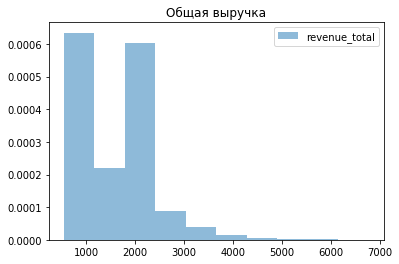

In [45]:
plt.title('Общая выручка')
#plt.hist(smart_tariff['messages'], bins=10, label='smart', density=True)
plt.hist(final_df['revenue_total'], bins=10, label='revenue_total', alpha=0.5, density=True)
plt.legend(loc='upper right')
plt.show()

Вывод: Посчитали месячную выручку по каждому клиенту. Как видно по графику, большинство клиентов  не выходят за рамки тарифного плана.


## Исследовательский анализ данных

Опишите поведение клиентов оператора, исходя из выборки. Сколько минут разговора, сколько сообщений и какой объём интернет-трафика требуется пользователям каждого тарифа в месяц? Посчитайте среднее количество, дисперсию и стандартное отклонение. Постройте гистограммы. Опишите распределения.

In [46]:
#посчитаем сколько минут разговора, сколько сообщений и какой объём интернет-трафика
#требуется пользователям каждого тарифа в месяц:
tariff_month=final_df.pivot_table(index=['month','tariff'], values=['messages','minutes','gbs','revenue_total'])
tariff_month


gbs   messages     minutes  revenue_total
month tariff                                                    
1     smart    8513.717647  18.235294  203.852941     721.323529
      ultra   13140.681111  33.777778  428.111111    1950.000000
2     smart   11597.054310  24.086207  298.689655     827.603448
      ultra   11775.937500  21.958333  297.125000    1975.000000
3     smart   15104.159091  31.857143  390.051948    1164.623377
      ultra   17535.550270  32.297297  489.648649    2014.864865
4     smart   13462.180625  30.741071  367.133929     963.089286
      ultra   16828.134364  31.563636  458.018182    2001.818182
5     smart   15805.184326  33.773050  387.361702    1197.510638
      ultra   19363.152985  37.850746  510.328358    2059.701493
6     smart   15794.647988  33.402439  395.640244    1204.018293
      ultra   18924.939286  41.726190  479.702381    2039.285714
7     smart   15743.150348  33.751244  408.353234    1223.950249
      ultra   20495.665165  49.846154  545.791209    2118.131868
8     smart   16610.720085  33.638298  421.468085    1320.595745
      ultra   19576.054673  48.439252  510.775701    2083.177570
9     smart   16303.578808  33.638462  428.611538    1249.946154
      ultra   19204.277130  52.286957  539.443478    2024.347826
10    smart   16757.122891  33.765306  426.136054    1364.853741
      ultra   20045.337317  58.430894  558.081301    2065.853659
11    smart   16895.696646  34.075949  435.265823    1343.047468
      ultra   19786.812463  55.791045  541.380597    2092.164179
12    smart   18113.662047  35.994065  478.560831    1578.531157
      ultra   21793.172590  60.611511  592.805755    2138.848921

In [47]:
#посчитаем в разрезе тарифа сколько минут разговора, сколько сообщений и какой объём интернет-трафика:
mean_tariff=tariff_month.pivot_table(index=['tariff'], values=['messages','minutes','gbs','revenue_total'])
mean_tariff


,gbs,messages,minutes,revenue_total
tariff,,,,
smart,15058.406234,31.413211,386.760499,1179.924424
ultra,18205.809571,43.714983,495.934310,2046.932856


In [48]:
#Сделаем срез тарифа смарт и тарифа ультра:
smart_tariff = final_df.query("tariff == 'smart'")
ultra_tariff = final_df.query("tariff == 'ultra'")

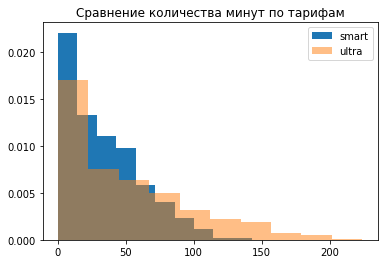

In [49]:
#Построим гистограммы по тарифам по кол-ву минут:
plt.title('Сравнение количества минут по тарифам')
plt.hist(smart_tariff['messages'], bins=10, label='smart', density=True)
plt.hist(ultra_tariff['messages'], bins=10, label='ultra', alpha=0.5, density=True)
plt.legend(loc='upper right')
plt.show()


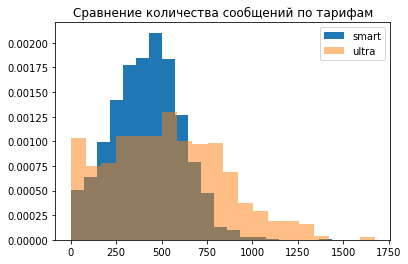

In [50]:
#Построим гистограммы по тарифам по кол-ву сообщений:
plt.title('Сравнение количества сообщений по тарифам')
plt.hist(smart_tariff['minutes'], bins=20, label='smart', density=True)
plt.hist(ultra_tariff['minutes'], bins=20, label='ultra', alpha=0.5, density=True)
plt.legend(loc='upper right')
plt.show()

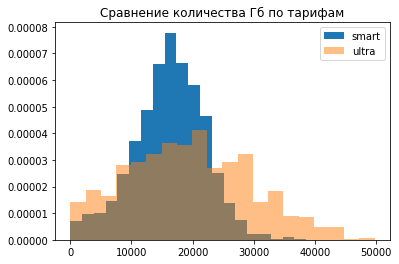

In [51]:
#Построим гистограммы по тарифам по кол-ву затраченных гб:
plt.title('Сравнение количества Гб по тарифам')
plt.hist(smart_tariff['gbs'], bins=20, label='smart', density=True)
plt.hist(ultra_tariff['gbs'], bins=20, label='ultra', alpha=0.5, density=True)
plt.legend(loc='upper right')
plt.show()

In [52]:
#посчитаем среднее, дисперсию и станд. отклонение по тарифам:
final_df.pivot_table(index='tariff', values=['messages','minutes','gbs','revenue_total'], aggfunc=['mean', 'var','std'])

mean                                                var  \
                 gbs   messages     minutes revenue_total           gbs   
tariff                                                                    
smart   16208.386990  33.384029  417.934948   1289.973531  3.446250e+07   
ultra   19468.805208  49.363452  526.623350   2070.152284  1.017510e+08   

                                                            std             \
           messages        minutes  revenue_total           gbs   messages   
tariff                                                                       
smart    796.812958   36219.315784  669785.708006   5870.476681  28.227876   
ultra   2285.266143  100873.633397  141516.745079  10087.170752  47.804457   

                                  
           minutes revenue_total  
tariff                            
smart   190.313730    818.404367  
ultra   317.606098    376.187114

Абонентам тарифа смарт не хватает гб интернета в рамках тарифа, в остальном они не выходят из бюджета.
Абоненты с тарифом Ультра не успевают потратить за месяц положенные минуты , соообщени и Гб.

## Проверка гипотезы

1. средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются;
2. средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов.

1. Нулевую гипотезу сформулируем следующим образом:

- Нулевая гипотеза H₀: Средняя выручка пользователей тарифов «Ультра» и «Смарт» равны
- Альтернативная гипотеза H₁: Средняя выручка пользователей тарифов «Ультра» и «Смарт» не равны



In [53]:
smart_tariff['revenue_total'].mean()

1289.9735307312696

In [54]:
ultra_tariff['revenue_total'].mean()

2070.1522842639592

Критический уровень значимости возьмем 5 %, чтобы вероятность правильного вывода была в 95%.  Укажем equal_var = False , так как дисперсии выборок очень отличаются.

In [55]:
alpha = .05

results = st.ttest_ind(
    smart_tariff['revenue_total'], 
    ultra_tariff['revenue_total'],equal_var = False)

print('p-значение: ', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение:  4.2606313931076085e-250
Отвергаем нулевую гипотезу


Средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются.

2. Нулевую гипотезу сформулируем следующим образом:

- Нулевая гипотеза H₀: средняя выручка пользователей из Москвы не отличается от выручки пользователей из других регионов
- Альтернативная гипотеза H₁:  средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов

In [56]:
#Сделаем срез по Москве и по региону:
Moscow_revenue= final_df.query("city == 'Москва'")
region_revenue= final_df.query("city !='Москва'")

In [57]:
# посчитаем среднюю выручку по москве:
Moscow_revenue['revenue_total'].mean()



1546.7135842880523

In [58]:
# посчитаем среднюю выручку по региону:
region_revenue['revenue_total'].mean()

1524.9362274298885

In [59]:
# посчитаем дисперсию по москве: 
Moscow_revenue['revenue_total'].var()

565636.467011886

In [60]:
# посчитаем дисперсию по региону:
region_revenue['revenue_total'].var()

654137.6285218114

Дисперсия практически не отличается, equal_var не будем указывать при проверке гипотезы.

In [61]:
alpha = .01 # Критический уровень значимости возьмем 5 %, чтобы вероятность правильного вывода была в 95% 

results = st.ttest_ind(
    Moscow_revenue['revenue_total'], 
    region_revenue['revenue_total'])

print('p-значение: ', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение:  0.5440152911670224
Не получилось отвергнуть нулевую гипотезу


Получается, что средняя выручка пользователей из Москвы не  отличается от выручки пользователей из других регионов.

## Общий вывод:

 В рамках задачи ошибок в данных не было найдено, привели даты к нужному типу , также столбцы к целочисленному типу.
Создали для анализа сводные таблицы. 
Была посчитана прибыль в разрезе по тарифам и по городу Москва и остальным регионам.
Проверили две гипотезы:

средняя прибыльность двух тарифов различается
прибыль от тарифа Ультра выше прибыли по тарифу Смарт
 Какой лучше тариф выбрать, нет однозначного ответа,Для пользователей лучше тариф смарт, дешевле и согласно данным, большинство пользователей  не выходят за рамки тарифа.Либо они экономят и следят , чтобы уложиться в услуги данного тарифа.
 Тариф Ультра приносит больше прибыли компание, но как показывают данные, многие не успевают потратить все предоставленные услуги в течение месяца.